# rf208_convolution
'ADDITION AND CONVOLUTION' RooFit tutorial macro #208
One-dimensional numeric convolution
(require ROOT to be compiled with --enable-fftw3)

pdf = landau(t) (x) gauss(t)




**Author:**  Clemens Lange, Wouter Verkerke (C version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:17 AM.</small></i>

In [1]:
import ROOT

Set up component pdfs
---------------------------------------

Construct observable

In [2]:
t = ROOT.RooRealVar("t", "t", -10, 30)

Construct landau(t,ml,sl)

In [3]:
ml = ROOT.RooRealVar("ml", "mean landau", 5.0, -20, 20)
sl = ROOT.RooRealVar("sl", "sigma landau", 1, 0.1, 10)
landau = ROOT.RooLandau("lx", "lx", t, ml, sl)

Construct gauss(t,mg,sg)

In [4]:
mg = ROOT.RooRealVar("mg", "mg", 0)
sg = ROOT.RooRealVar("sg", "sg", 2, 0.1, 10)
gauss = ROOT.RooGaussian("gauss", "gauss", t, mg, sg)

Construct convolution pdf
---------------------------------------

Set #bins to be used for FFT sampling to 10000

In [5]:
t.setBins(10000, "cache")

Construct landau (x) gauss

In [6]:
lxg = ROOT.RooFFTConvPdf("lxg", "landau (X) gauss", t, landau, gauss)

Sample, fit and plot convoluted pdf
----------------------------------------------------------------------

Sample 1000 events in x from gxlx

In [7]:
data = lxg.generate({t}, 10000)

Fit gxlx to data

In [8]:
lxg.fitTo(data, PrintLevel=-1)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooRealVar::setRange(t) new range named 'refrange_fft_lxg' created with bounds [-10,30]
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxg) creating new cache 0xb364580 with pdf lx_CONV_gauss_CACHE_Obs[t]_NORM_t for nset (t) with code 0
[#1] INFO:Fitting -- RooAbsPdf::fitTo(lxg_over_lxg_Int[t]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_lxg_over_lxg_Int[t]_lxgData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxg) creating new cache 0xb5e9e20 with pdf lx_CONV_gauss_CACHE_Obs[t] for nset () with code 1 from preexisting content.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Plot data, pdf, landau (X) gauss pdf

In [9]:
frame = t.frame(Title="landau (x) gauss convolution")
data.plotOn(frame)
lxg.plotOn(frame)
landau.plotOn(frame, LineStyle="--")

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxg) creating new cache 0xb8685f0 with pdf lx_CONV_gauss_CACHE_Obs[t]_NORM_t for nset (t) with code 0


Draw frame on canvas

In [10]:
c = ROOT.TCanvas("rf208_convolution", "rf208_convolution", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()

c.SaveAs("rf208_convolution.png")

Info in <TCanvas::Print>: png file rf208_convolution.png has been created


Draw all canvases 

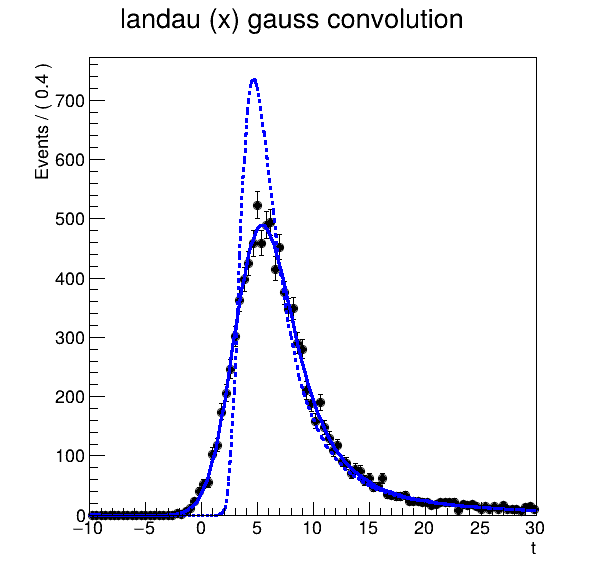

In [11]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()